# **Эпоха рекомендательных систем**

Быстрый рост сбора данных привел к новой эре информации. Данные используются для создания более эффективных систем, и именно здесь вступают в игру рекомендательные системы. Системы рекомендаций — это тип **систем фильтрации информации**, поскольку они улучшают качество результатов поиска и предоставляют элементы, которые более релевантны элементу поиска или относятся к истории поиска пользователя


Они используются для прогнозирования **рейтинга** или **предпочтения**, которые пользователь дал бы элементу. Почти каждая крупная технологическая компания применяет их в той или иной форме: Amazon использует их, чтобы предлагать товары клиентам, YouTube использует их, чтобы решить, какое видео воспроизводить следующим при автоматическом воспроизведении, а Facebook использует их, чтобы рекомендовать страницы, которым нужно нравиться, и людям, на которых стоит подписаться. .
Более того, такие компании, как Netflix и Spotify, в значительной степени зависят от эффективности своих систем рекомендаций для своего бизнеса и успеха.

![](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

[TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

**So let's go!**

В основном существует три типа рекомендательных систем:

> * **Демографическая фильтрация** — они предлагают обобщенные рекомендации каждому пользователю в зависимости от популярности фильма и/или жанра. Система рекомендует одни и те же фильмы пользователям с похожими демографическими характеристиками. Поскольку каждый пользователь индивидуален, такой подход считается слишком простым. Основная идея этой системы заключается в том, что фильмы, которые более популярны и получили признание критиков, с большей вероятностью понравятся средней аудитории.



> * **Фильтрация на основе содержания**- Они предлагают похожие элементы на основе определенного элемента. Эта система использует метаданные элементов, такие как жанр, режиссер, описание, актеры и т. д. для фильмов, чтобы дать эти рекомендации. Общая идея этих рекомендательных систем заключается в том, что если человеку понравился определенный товар, ему или ей также понравится предмет, похожий на него.

> * **Совместная фильтрация** - Эта система подбирает людей со схожими интересами и предоставляет рекомендации на основе этого совпадения. Совместные фильтры не требуют метаданных элемента, как их аналоги на основе содержимого.

Let's load the data now.

In [129]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [130]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [131]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


Первый набор данных содержит следующие функции:-

* movie_id - A unique identifier for each movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.

Второй набор данных имеет следующие особенности:- 

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average -  average ratings the movie recieved.
* vote_count - the count of votes recieved.

Давайте присоединимся к двум наборам данных в столбце «id»


In [132]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

Just a peak at our data.

In [133]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# **Демографическая фильтрация** -
    Прежде чем приступить к этому -
* нам нужна метрика, чтобы оценить или оценить фильм
* Рассчитать счет для каждого фильма
* Сортируйте оценки и рекомендуйте пользователям фильм с лучшим рейтингом.

Мы можем использовать средние оценки фильма в качестве оценки, но это будет недостаточно справедливо, поскольку фильм со средней оценкой 8,9 и всего 3 голосами не может считаться лучше, чем фильм со средней оценкой 7,8, но 40 голосами.
Итак, я буду использовать взвешенный рейтинг IMDB (wr), который дается как:

![](https://image.ibb.co/jYWZp9/wr.png)
где,
* v — количество голосов за фильм;
* m — минимальное количество голосов, необходимое для включения в диаграмму;
* R — средний рейтинг фильма; 
* C — средний голос по всему отчету.

У нас уже есть v(**vote_count**) и R (**vote_average**), а C можно рассчитать как -

In [134]:
df2.loc[0].T

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [135]:
C= df2['vote_average'].mean()
C

6.092171559442011

Таким образом, средний рейтинг для всех фильмов составляет приблизительно 6 баллов по 10-балльной шкале. Следующим шагом является определение подходящего значения для m, минимального количества голосов, необходимых для отображения в таблице. Мы будем использовать 90-й процентиль в качестве нашего порога. Другими словами, чтобы фильм попал в чарты, он должен набрать больше голосов, чем не менее 90% фильмов в списке.

In [136]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

Теперь мы можем отфильтровать фильмы, подходящие для диаграммы.

In [137]:
df2.shape

(4803, 23)

In [138]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

Мы видим, что в этот список попал 481 фильм. Теперь нам нужно рассчитать нашу метрику для каждого квалифицированного фильма. Для этого мы определим функцию **weighted_rating()** и определим новую функцию **score**, значение которой мы вычислим, применив эту функцию к нашему кадру данных квалифицированных фильмов:

In [139]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Расчет по формуле IMDB
    return (v/(v+m) * R) + (m/(m+v) * C)

In [140]:
#Определите новую функцию «оценка» и рассчитайте ее значение с помощью «weighted_rating()».`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

Наконец, давайте отсортируем DataFrame на основе функции оценки и выведем название, количество голосов, среднее число голосов и взвешенный рейтинг или оценку 10 лучших фильмов.

In [141]:
#Сортировка фильмов на основе оценки, рассчитанной выше
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(100)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
...,...,...,...,...
2178,Into the Wild,3045,7.8,7.157073
114,Harry Potter and the Goblet of Fire,5608,7.5,7.152429
684,The Hateful Eight,4274,7.6,7.146497
3706,Donnie Darko,3452,7.7,7.141284


Ура! Мы сделали наш первый (хотя и очень простой) рекомендатель.
На вкладке **В тренде** этих систем мы находим фильмы, которые очень популярны, и их можно просто получить, отсортировав набор данных по столбцу популярности.

In [142]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt


In [143]:
pop['popularity']

546     875.581305
95      724.247784
788     514.569956
94      481.098624
127     434.278564
           ...    
4625      0.001389
4118      0.001186
4727      0.001117
3361      0.000372
4553      0.000000
Name: popularity, Length: 4803, dtype: float64

Text(0.5, 1.0, 'Popular Movies')

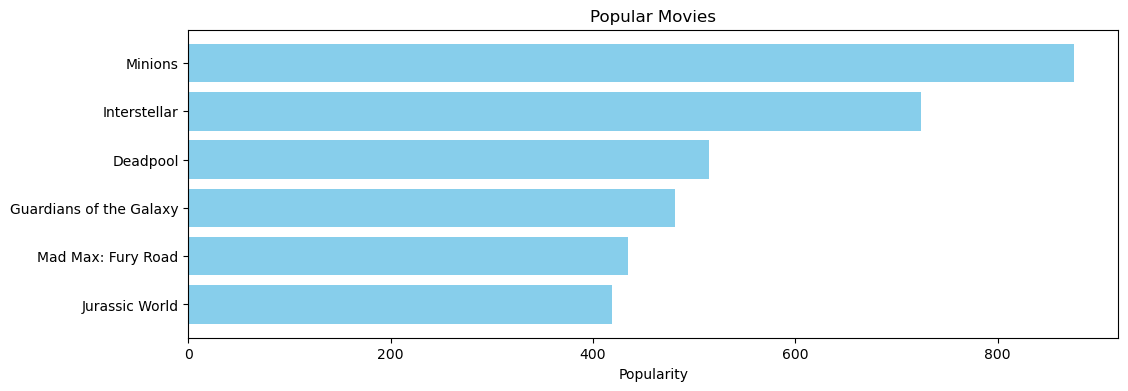

In [144]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Теперь следует помнить, что эти демографические рекомендации предоставляют общую таблицу рекомендуемых фильмов для всех пользователей. Они не чувствительны к интересам и вкусам конкретного пользователя.
Это когда мы переходим к более усовершенствованной системе — Content Basesd Filtering.

## **Контентная фильтрация**
В этой рекомендательной системе содержание фильма (обзор, актерский состав, съемочная группа, ключевое слово, слоган и т. д.) используется для поиска его сходства с другими фильмами. Затем рекомендуются фильмы, которые, скорее всего, будут похожи.

![](https://image.ibb.co/f6mDXU/conten.png)

## **Plot description based Recommender**

Мы будем вычислять попарные оценки сходства для всех фильмов на основе их сюжетных описаний и рекомендовать фильмы на основе этой оценки сходства. Описание графика приведено в функции **обзор** нашего набора данных.
Давайте взглянем на данные. ..

In [145]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

Для любого из вас, кто хотя бы немного занимался обработкой текста, знает, что нам нужно преобразовать вектор слов каждого обзора.
Теперь мы вычислим векторы Term Frequency-Inverse Document Frequency (TF-IDF) для каждого обзора.

Теперь, если вам интересно, что такое частота термина, это относительная частота слова в документе, которая задается как
    **(экземпляры термина/общее количество экземпляров)**.
Обратная частота документов - это относительное количество документов, содержащих термин, указанный как
**журнал(количество документов/документов со сроком)**
Общая важность каждого слова для документов, в которых они появляются, равна **TF * IDF**.

Это даст вам матрицу, в которой каждый столбец представляет слово в обзорном словаре (все слова, которые встречаются хотя бы в одном документе), а каждая строка представляет фильм, как и раньше. Это сделано для уменьшения важности часто встречающихся слов. в обзорах сюжетов и, следовательно, их значимость при вычислении окончательной оценки сходства.

К счастью, scikit-learn предоставляет вам встроенный класс TfIdfVectorizer, который создает матрицу TF-IDF в пару строк. Это здорово, не так ли?

In [146]:
df2.shape

(4803, 23)

In [147]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [148]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

Мы видим, что для описания 4800 фильмов в наших наборах данных использовалось более 20 000 различных слов..

With this matrix in hand, we can now compute a similarity score. There are several candidates for this; such as the euclidean, the Pearson and the [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity). There is no right answer to which score is the best. Различные оценки хорошо работают в разных сценариях, и часто бывает полезно поэкспериментировать с разными метриками.

Мы будем использовать косинусное сходство для вычисления числовой величины, обозначающей сходство между двумя фильмами. Мы используем показатель косинусного подобия, поскольку он не зависит от величины и его относительно легко и быстро вычислить. Математически это определяется следующим образом:
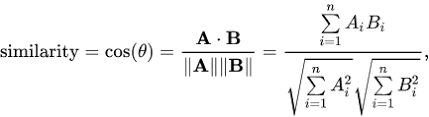

Поскольку мы использовали векторизатор TF-IDF, вычисление скалярного произведения напрямую даст нам оценку косинусного сходства. Поэтому мы будем использовать **linear_kernel()** sklearn вместо cosine_similarities(), так как он быстрее.

In [149]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [150]:
cosine_sim.shape

(4803, 4803)

In [151]:
#cosine_sim

In [152]:
#cosine_sim[2]

Мы собираемся определить функцию, которая принимает название фильма в качестве входных данных и выводит список из 10 наиболее похожих фильмов. Во-первых, для этого нам понадобится обратное отображение названий фильмов и индексов DataFrame. Другими словами, нам нужен механизм для определения индекса фильма в нашем DataFrame метаданных с учетом его названия.

In [153]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()


Теперь мы можем определить нашу рекомендательную функцию. Вот следующие шаги, которые мы будем следовать: -
* Получить индекс фильма по его названию.
* Получить список оценок косинусного сходства для этого конкретного фильма со всеми фильмами. Преобразуйте его в список кортежей, где первый элемент — это его позиция, а второй — оценка сходства.
* Сортировка вышеупомянутого списка кортежей на основе оценок сходства; то есть второй элемент.
* Получите 10 лучших элементов этого списка. Игнорируйте первый элемент, так как он относится к себе (фильм, наиболее похожий на конкретный фильм, — это сам фильм).
* Вернуть заголовки, соответствующие индексам верхних элементов.

In [154]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [155]:
get_recommendations('JFK')

2507                Slow Burn
879       Law Abiding Citizen
2020               The Rookie
2193     Secret in Their Eyes
2697                    Bobby
753              The Sentinel
1202             Legal Eagles
817          American Wedding
65            The Dark Knight
3       The Dark Knight Rises
Name: title, dtype: object

In [156]:
get_recommendations('Interstellar')

1709         Space Pirate Captain Harlock
300                     Starship Troopers
4353                    The Green Inferno
220                            Prometheus
2260                      All Good Things
268                         Stuart Little
1352                              Gattaca
4176    Battle for the Planet of the Apes
2648                       Winnie Mandela
634                            The Matrix
Name: title, dtype: object

In [157]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

Хотя наша система неплохо нашла фильмы с похожим описанием сюжета, качество рекомендаций не так уж и велико. «Темный рыцарь: восстание» возвращает все фильмы о Бэтмене, в то время как более вероятно, что люди, которым понравился этот фильм, более склонны наслаждаться другими фильмами Кристофера Нолана. Это то, что не может быть захвачено существующей системой.

## **Кредиты, жанры и рекомендации на основе ключевых слов**
Само собой разумеется, что качество нашего рекомендателя будет повышено за счет использования лучших метаданных. Именно этим мы и займемся в этом разделе. Мы собираемся создать рекомендатель на основе следующих метаданных: 3 главных актера, режиссер, родственные жанры и ключевые слова сюжета фильма.

Из характеристик актерского состава, съемочной группы и ключевых слов нам нужно выделить трех наиболее важных актеров, режиссера и ключевые слова, связанные с этим фильмом. Прямо сейчас наши данные представлены в виде «строчных» списков, нам нужно преобразовать их в безопасную и удобную структуру.

In [158]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [159]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,9367,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de..."
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de..."
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmarkch

Далее мы напишем функции, которые помогут нам извлечь необходимую информацию из каждой функции.

In [160]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [161]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [162]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [163]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


Следующим шагом будет преобразование имен и экземпляров ключевых слов в нижний регистр и удаление всех пробелов между ними. Это сделано для того, чтобы наш векторизатор не считал Джонни из «Джонни Деппа» и «Джонни Галэки» одним и тем же.

In [164]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [165]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

Теперь мы можем создать наш «суп метаданных», представляющий собой строку, содержащую все метаданные, которые мы хотим передать нашему векторизатору (а именно, актеров, режиссера и ключевые слова).

In [166]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [167]:
df2['soup'][0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

Следующие шаги такие же, как и с нашим рекомендателем на основе описания сюжета. Одно важное отличие состоит в том, что мы используем **CountVectorizer()** вместо TF-IDF. Это потому, что мы не хотим преуменьшать присутствие актера/режиссера, если он или она снялся или снялся в относительно большем количестве фильмов. Это не имеет большого интуитивного смысла.

In [168]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [169]:
count_matrix.data

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [170]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [171]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [172]:
cosine_sim2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

Теперь мы можем повторно использовать нашу функцию **get_recommendations()**, передав новую матрицу **cosine_sim2** в качестве второго аргумента.

In [173]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [127]:
get_recommendations('Interstellar', cosine_sim2)

270                      The Martian
2375                Midnight Special
363     A.I. Artificial Intelligence
1446                The Tree of Life
2752                      Ex Machina
3043                End of the Spear
3373        The Other Side of Heaven
3624                            Moon
39                      TRON: Legacy
43              Terminator Salvation
Name: title, dtype: object

In [126]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

Мы видим, что наш рекомендатель успешно собирает больше информации благодаря большему количеству метаданных и дает нам (возможно) лучшие рекомендации. Более вероятно, что поклонникам комиксов Marvel или DC понравятся фильмы того же производства. Поэтому к нашим функциям выше мы можем добавить *production_company* .
Мы также можем увеличить вес директора, добавив функцию несколько раз в суп.

# **Collaborative Filtering**

Наш движок, основанный на контенте, имеет некоторые серьезные ограничения. Он может только предлагать фильмы, которые близки к определенному фильму. То есть он не способен улавливать вкусы и давать рекомендации по жанрам.

Кроме того, созданный нами движок на самом деле не является личным, поскольку он не учитывает личные вкусы и предубеждения пользователя. Любой, кто запросит у нашего движка рекомендации, основанные на фильме, получит те же рекомендации для этого фильма, независимо от того, кто он/она.

Поэтому в этом разделе мы будем использовать метод совместной фильтрации, чтобы давать рекомендации кинозрителям.
В основном это два типа: -

* **Фильтрация на основе пользователей**- Эти системы рекомендуют пользователям продукты, которые понравились похожим пользователям. Для измерения сходства между двумя пользователями мы можем использовать либо корреляцию Пирсона, либо косинусное сходство.
Этот метод фильтрации можно проиллюстрировать на примере. В следующих матрицах каждая строка представляет пользователя, а столбцы соответствуют разным фильмам, кроме последнего, в котором зафиксировано сходство между этим пользователем и целевым пользователем. Каждая ячейка представляет рейтинг, который пользователь дает этому фильму. Предположим, что пользователь E является целью.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

Поскольку пользователи A и F не имеют общих рейтингов фильмов с пользователем E, их сходство с пользователем E не определяется в корреляции Пирсона. Следовательно, нам нужно рассмотреть только пользователей B, C и D. На основе корреляции Пирсона мы можем вычислить следующее сходство.
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

Из приведенной выше таблицы видно, что пользователь D сильно отличается от пользователя E, так как корреляция Пирсона между ними отрицательна. Он оценил «До встречи с тобой» выше своего среднего рейтинга, в то время как пользователь E сделал наоборот. Теперь мы можем начать заполнять пробел для фильмов, которые пользователь E не оценил на основе других пользователей.
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

Хотя вычисление пользовательского CF очень просто, оно имеет несколько проблем. Одна из основных проблем заключается в том, что предпочтения пользователей могут меняться со временем. Это указывает на то, что предварительное вычисление матрицы на основе их соседних пользователей может привести к плохой производительности. Чтобы решить эту проблему, мы можем применить CF на основе элементов.

* ** Совместная фильтрация на основе элементов ** - вместо измерения сходства между пользователями CF на основе элементов рекомендует элементы на основе их сходства с элементами, которые оценил целевой пользователь. Точно так же сходство можно вычислить с помощью корреляции Пирсона или косинусного сходства. Основное отличие состоит в том, что при совместной фильтрации на основе элементов мы заполняем пробел вертикально, а не горизонтально, как это делает CF на основе пользователей. В следующей таблице показано, как это сделать для фильма «До встречи с тобой».
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

Это успешно позволяет избежать проблемы, возникающей из-за динамических пользовательских предпочтений, поскольку CF на основе элементов более статичен. Однако для этого метода остается несколько проблем. Во-первых, основной проблемой является ***масштабируемость***. Объем вычислений растет вместе с клиентом и продуктом. Сложность в наихудшем случае составляет O(mn) с m пользователями и n элементами. Кроме того, еще одной проблемой является ***разреженность***. Посмотрите еще раз на приведенную выше таблицу. Хотя есть только один пользователь, который оценил и «Матрицу», и «Титаник», сходство между ними равно 1. В крайних случаях у нас могут быть миллионы пользователей, и сходство между двумя довольно разными фильмами может быть очень высоким просто потому, что они имеют одинаковый рейтинг для единственный пользователь, который оценил их обоих.



#### **Разложение по одному значению** 
Одним из способов решения проблемы масштабируемости и разреженности, создаваемой CF, является использование **модели скрытых факторов** для выявления сходства между пользователями и элементами. По сути, мы хотим превратить проблему рекомендаций в проблему оптимизации. Мы можем рассматривать это как то, насколько хорошо мы предсказываем оценку элементов, предоставленных пользователем. Одной из распространенных метрик является среднеквадратическая ошибка (RMSE). **Чем ниже RMSE, тем выше производительность**.

Теперь, говоря о латентном факторе, вам может быть интересно, что это такое? Это широкая идея, описывающая свойство или концепцию, которыми обладает пользователь или предмет. Например, для музыки скрытый фактор может относиться к жанру, к которому принадлежит музыка. SVD уменьшает размер матрицы полезности, извлекая ее скрытые факторы. По сути, мы отображаем каждого пользователя и каждый элемент в скрытое пространство размерности r. Таким образом, это помогает нам лучше понять взаимосвязь между пользователями и элементами, поскольку они становятся напрямую сопоставимыми. Рисунок ниже иллюстрирует эту идею.

![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

Теперь достаточно сказано, давайте посмотрим, как это реализовать.
Поскольку набор данных, который мы использовали ранее, не имел идентификатора пользователя (который необходим для совместной фильтрации), давайте загрузим другой набор данных. [**Surprise** ](https://surprise.readthedocs.io/en/stable/index.html) - SVD.

In [174]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('ratings_small.csv')
ratings.head()


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [179]:
temp = ratings.groupby(["userId"])["movieId"].count()

In [180]:
temp.max()

2391

Обратите внимание, что в этом наборе данных фильмы оцениваются по пятибалльной шкале, в отличие от предыдущего.

In [182]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
#data.split(n_folds=5)

In [183]:
svd = SVD()
result = cross_validate(svd, data, measures=['RMSE', 'MAE','FCP'],cv=5)

In [184]:
result

{'test_rmse': array([0.90028143, 0.89848978, 0.88530799, 0.90550429, 0.89731811]),
 'test_mae': array([0.69436503, 0.69237775, 0.68107635, 0.69581741, 0.6932739 ]),
 'test_fcp': array([0.64069704, 0.63481645, 0.6436192 , 0.63401451, 0.63909641]),
 'fit_time': (1.0564312934875488,
  1.1076257228851318,
  1.1201627254486084,
  1.01493501663208,
  1.0375585556030273),
 'test_time': (0.3619418144226074,
  0.21502447128295898,
  0.13388347625732422,
  0.12666702270507812,
  0.12913894653320312)}

In [185]:
result['test_rmse'].mean()

0.8973803201177377

In [186]:
result['test_mae'].mean()

0.6913820896762845

In [46]:
result['test_fcp'].mean()

0.6387305208025211

Мы получаем среднюю среднеквадратичную ошибку приблизительно 0,89, что более чем достаточно для нашего случая. Давайте теперь потренируемся на нашем наборе данных и сделаем прогнозы.

In [187]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Давайте выберем пользователя с идентификатором пользователя 1 и проверим оценки, которые он/она поставил.

In [191]:
ratings[ratings['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [192]:
result = svd.predict(uid= 1, iid=301) # uid =userId;  iid = movieId  # r_ui - истинный рейтинг

In [193]:
result

Prediction(uid=1, iid=301, r_ui=None, est=2.9531455697666598, details={'was_impossible': False})

In [194]:
fg = []
for i in ratings['movieId'].unique():
     result = svd.predict(1, i, None)
     fg.append([i,result.est])


In [195]:
fg[:10]

[[31, 2.4333421274897975],
 [1029, 2.709536101182291],
 [1061, 2.8074604778976235],
 [1129, 2.4181672665922953],
 [1172, 3.3890211735612517],
 [1263, 2.819838391600908],
 [1287, 2.731986309234983],
 [1293, 2.8752422674344262],
 [1339, 2.7883128709745946],
 [1343, 2.7928508986183727]]

In [196]:
fg = np.array(fg)

In [197]:
fg.max(axis=0)

array([1.63949000e+05, 3.71443601e+00])

Для фильма с идентификатором 302 мы получаем приблизительный прогноз **2,57**. Одной из поразительных особенностей этой рекомендательной системы является то, что ей все равно, что это за фильм (или что в нем содержится). Он работает исключительно на основе присвоенного идентификатора фильма и пытается предсказать рейтинги на основе того, как другие пользователи предсказали фильм.

In [55]:
from collections import defaultdict

from surprise import SVD
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=4):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

kf = KFold(n_splits=5)
algo = SVD()
#data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
data = Dataset.load_builtin("ml-100k")
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=4)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\andru/.surprise_data/ml-100k
0.608650962154147
0.28198189579810845
0.6312371516193168
0.2859211653966138
0.6220676203956454
0.2934102890057923
0.6452056927401576
0.2945671548751444
0.620101752259759
0.2821151379831109


## **Заключение**
Мы создаем рекомендателей, используя демографическую, контентную и совместную фильтрацию. В то время как демографическая фильтрация очень элементарна и не может использоваться на практике, **гибридные системы** могут использовать преимущества контентной и совместной фильтрации, поскольку доказано, что эти два подхода практически дополняют друг друга.
Эта модель была очень базовой и обеспечивает только фундаментальную основу для начала.


1. [https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75](https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75)
2. [https://www.kaggle.com/rounakbanik/movie-recommender-systems](https://www.kaggle.com/rounakbanik/movie-recommender-systems)
3. [http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf](http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf)

